# **Introdução à Ciência de Dados**

**Professor**: Yuri Malheiros

**Grupo**: Daniel Arnóbio Dantas da Silva, Gustavo Henrique da Silva Costa Araujo e Jardel da Cunha Nascimento.

**introdução:** O ano de 2022 foi ano de eleição, decidimos realizar o projeto utilizando os dados abertos do TSE sobre as eleições, para realizarmos uma exploração dos dados e conseguirmos retirar gráficos que respondem algumas questões.

## **Projeto - Relatório final**

**Título:** Compreendendo o perfil de eleitores das zonas eleitorais em João Pessoa.





**Perguntas:**

Qual a zona eleitoral onde a maioria são mulheres?

Qual a zona eleitoral onde a maioria são homens?

Qual zona eleitoral possui mais jovens?

Qual zona eleitoral possui mais idosos?

Qual zona eleitoral possui mais eleitores com ensino superior completo?

Qual zona eleitoral possui mais eleitores analfabetos?

In [1]:
#Importando as bibliotecas
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme()

In [2]:
#Download do dataset
perfil_secao = pd.read_csv('https://raw.githubusercontent.com/NigGusta/ICD-Projeto-Final/main/csv/perfil_eleitorado_secao_jp.csv')

#Mantendo apenas as colunas de interesse, fazendo já uma limpeza dos dados
perfil_secao.drop(columns=['ano', 'sigla_uf', 'id_municipio', 'id_municipio_tse', 'situacao_biometria'], inplace=True)
perfil_secao.head()

,zona,secao,genero,estado_civil,grupo_idade,instrucao,eleitores,eleitores_biometria,eleitores_deficiencia,eleitores_inclusao_nome_social
0,76,179,feminino,casado(a),35 a 39 anos,ensino superior completo,27,26,0,0
1,77,288,feminino,solteiro(a),25 a 29 anos,ensino superior incompleto,9,9,0,0
2,76,10,masculino,casado(a),50 a 54 anos,ensino superior completo,10,10,0,0
3,1,223,feminino,solteiro(a),30 a 34 anos,ensino superior completo,11,11,0,0
4,76,361,feminino,solteiro(a),21 a 24 anos,ensino medio completo,12,10,0,0


In [10]:
resultados_secao = pd.read_csv('https://raw.githubusercontent.com/NigGusta/ICD-Projeto-Final/main/csv/resultados_2T.csv')
colunas = ['zona', 'secao', 'vPresA22', 'vPresB13', 'vPresNulo', 'vPresBranco']
resultados_secao = resultados_secao[colunas]

In [3]:
perfil_secao.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33782 entries, 0 to 33781
Data columns (total 10 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   zona                            33782 non-null  int64 
 1   secao                           33782 non-null  int64 
 2   genero                          33782 non-null  object
 3   estado_civil                    33782 non-null  object
 4   grupo_idade                     33782 non-null  object
 5   instrucao                       33782 non-null  object
 6   eleitores                       33782 non-null  int64 
 7   eleitores_biometria             33782 non-null  int64 
 8   eleitores_deficiencia           33782 non-null  int64 
 9   eleitores_inclusao_nome_social  33782 non-null  int64 
dtypes: int64(6), object(4)
memory usage: 2.6+ MB


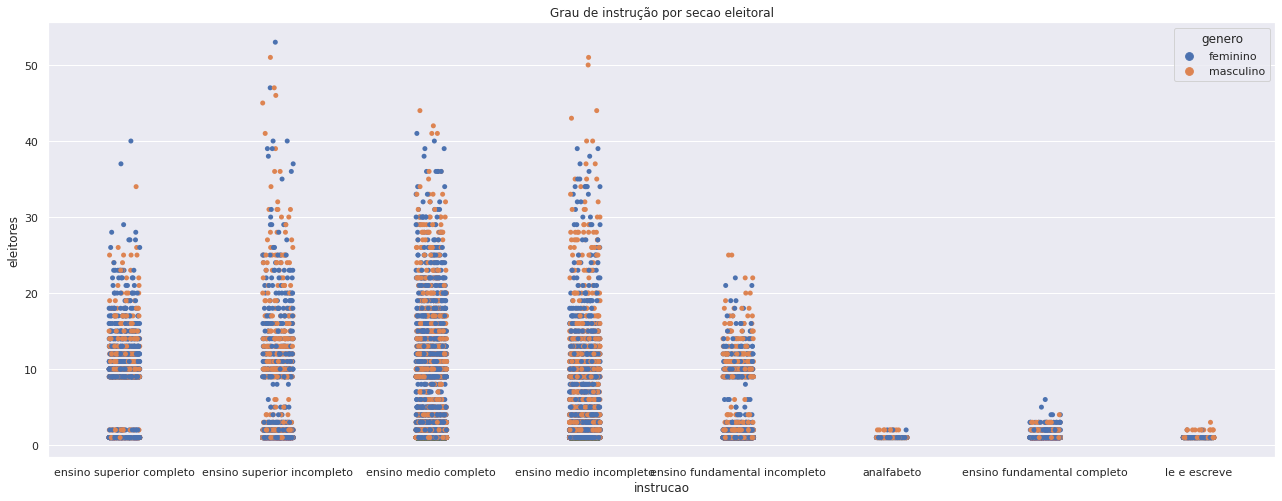

In [4]:
ax = sns.stripplot(data =perfil_secao, x = 'instrucao', y = 'eleitores', hue = 'genero')
ax.figure.set_size_inches(22, 8)
plt.title('Grau de instrução por secao eleitoral');

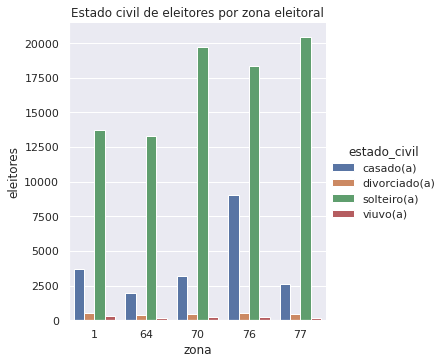

In [5]:
colunas = ['zona', 'estado_civil']
df_estado_civil = pd.DataFrame(perfil_secao.groupby(colunas)['eleitores'].sum()).reset_index()
ax = sns.catplot(data = df_estado_civil, x = 'zona', y = 'eleitores', kind ='bar', hue = 'estado_civil')
plt.title('Estado civil de eleitores por zona eleitoral');


Qual zona eleitoral possui mais eleitores com ensino superior completo?

Qual zona eleitoral possui mais eleitores analfabetos?

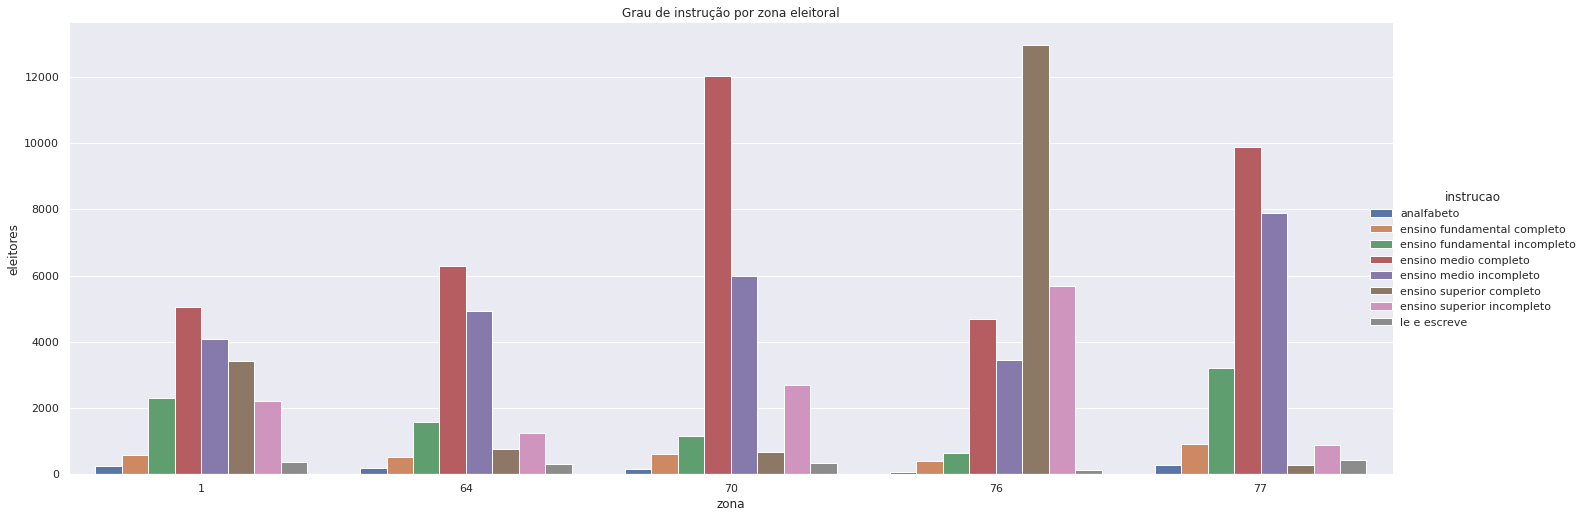

In [6]:
colunas = ['zona', 'instrucao']
df_instrucao = pd.DataFrame(perfil_secao.groupby(colunas)['eleitores'].sum()).reset_index()
#df_instrucao = df_instrucao.pivot(index = 'zona', columns= 'instrucao', values='eleitores')
#df_instrucao.fillna(0, inplace = True)
ax = sns.catplot(data = df_instrucao, x = 'zona', y = 'eleitores', hue = 'instrucao', kind = 'bar', height = 4, aspect = 6)
ax.figure.set_size_inches(22, 8)
plt.title('Grau de instrução por zona eleitoral');

In [7]:
df_instrucao = df_instrucao.pivot(index = 'zona', columns= 'instrucao', values='eleitores')
df_instrucao.fillna(0, inplace = True)
df_instrucao

instrucao,analfabeto,ensino fundamental completo,ensino fundamental incompleto,ensino medio completo,ensino medio incompleto,ensino superior completo,ensino superior incompleto,le e escreve
zona,,,,,,,,
1,249,568,2314,5045,4084,3416,2216,365
64,180,518,1573,6293,4947,759,1256,301
70,155,618,1155,12031,5989,679,2685,336
76,81,404,642,4704,3445,12977,5701,141
77,276,902,3198,9871,7881,266,892,437


Este gráfico de calor mostra as correlações entre o eixo X e Y, quanto mais próximo de 1 maior a correlação e quanto mais longe de 1 menor a correlação.

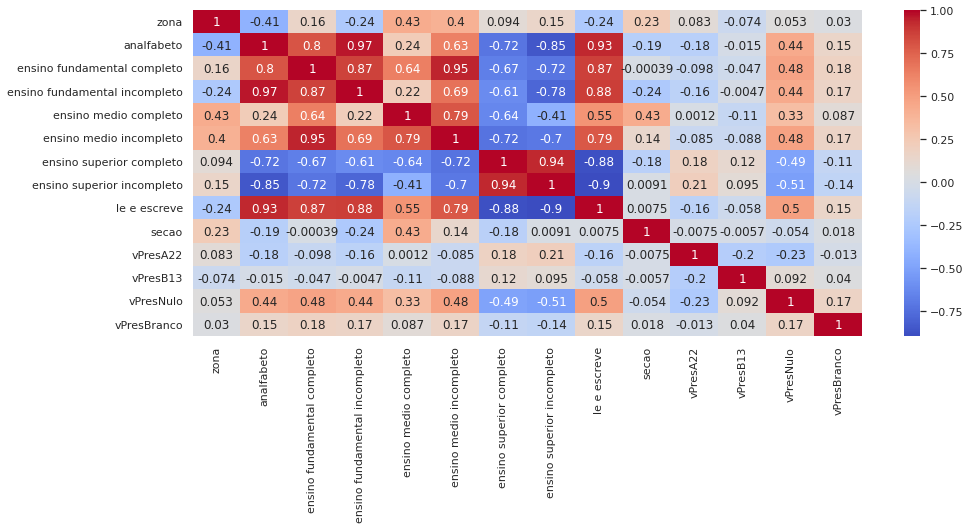

In [11]:

colunas = ['zona', 'instrucao']
df_instrucao = pd.DataFrame(perfil_secao.groupby(colunas)['eleitores'].sum()).reset_index()
df_instrucao = df_instrucao.pivot(index = 'zona', columns= 'instrucao', values='eleitores')
df_instrucao.fillna(0, inplace = True)
df_instrucao = df_instrucao.merge(resultados_secao, on = 'zona', how = 'inner')
plt.figure(figsize=(15, 6))
sns.heatmap(df_instrucao.corr(), cmap='coolwarm', annot= True);

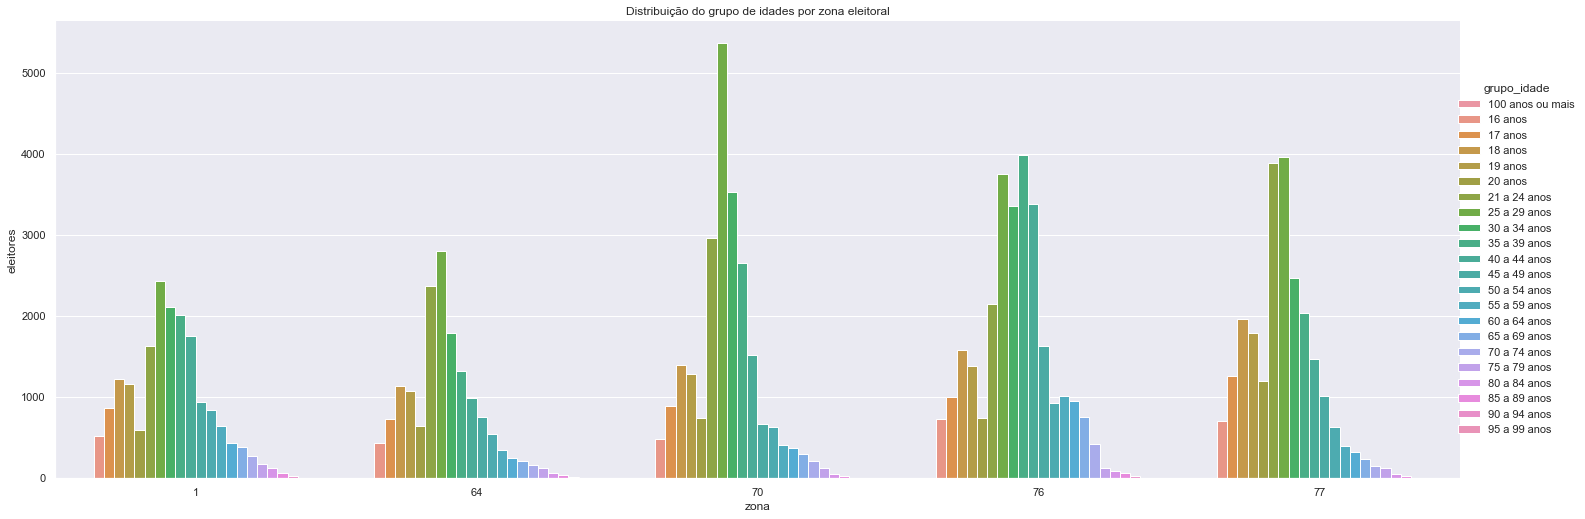

In [ ]:
colunas = ['zona', 'grupo_idade']
df_grupo_idade = pd.DataFrame(perfil_secao.groupby(colunas)['eleitores'].sum()).reset_index()
#df_grupo_idade = df_grupo_idade.pivot(index = 'zona', columns= 'grupo_idade', values='eleitores')
df_grupo_idade.fillna(0, inplace = True)
ax = sns.catplot(data = df_grupo_idade, x = 'zona', y = 'eleitores', hue = 'grupo_idade', kind = 'bar', height = 4, aspect = 6)
plt.title('Distribuição do grupo de idades por zona eleitoral');
ax.figure.set_size_inches(22, 8)

Qual a zona eleitoral onde a maioria são mulheres?

Qual a zona eleitoral onde a maioria são homens?

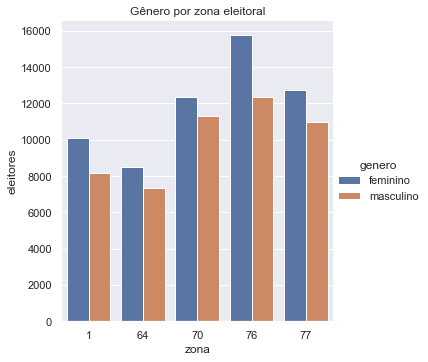

In [ ]:
colunas = ['zona', 'genero']
df_genero = pd.DataFrame(perfil_secao.groupby(colunas)['eleitores'].sum()).reset_index()
#df_genero = df_genero.pivot(index = 'zona', columns= 'genero', values='eleitores')
df_genero.fillna(0, inplace = True)
sns.catplot(data = df_genero, x = 'zona', y = 'eleitores', kind ='bar', hue = 'genero')
plt.title('Gênero por zona eleitoral');

In [12]:
df_grupo_idade_ct = pd.crosstab(index = perfil_secao.zona, columns= perfil_secao.grupo_idade, values = perfil_secao.eleitores, aggfunc='sum').reset_index()
df_grupo_idade_ct

grupo_idade,zona,100 anos ou mais,16 anos,17 anos,18 anos,19 anos,20 anos,21 a 24 anos,25 a 29 anos,30 a 34 anos,...,50 a 54 anos,55 a 59 anos,60 a 64 anos,65 a 69 anos,70 a 74 anos,75 a 79 anos,80 a 84 anos,85 a 89 anos,90 a 94 anos,95 a 99 anos
0,1,1.0,523.0,861.0,1226.0,1162.0,596.0,1632.0,2439.0,2111.0,...,848.0,645.0,440.0,385.0,278.0,176.0,129.0,65.0,28.0,5.0
1,64,NaN,435.0,735.0,1134.0,1078.0,645.0,2370.0,2806.0,1788.0,...,546.0,346.0,251.0,216.0,167.0,121.0,64.0,43.0,13.0,NaN
2,70,NaN,487.0,891.0,1403.0,1286.0,749.0,2960.0,5370.0,3528.0,...,636.0,407.0,378.0,294.0,210.0,126.0,57.0,23.0,6.0,1.0
3,76,4.0,726.0,1000.0,1577.0,1381.0,748.0,2147.0,3755.0,3358.0,...,925.0,1014.0,956.0,753.0,422.0,133.0,94.0,60.0,24.0,4.0
4,77,NaN,707.0,1260.0,1968.0,1791.0,1194.0,3892.0,3966.0,2474.0,...,627.0,393.0,330.0,233.0,146.0,122.0,59.0,27.0,8.0,2.0


Tratando a coluna grupo_idade.

In [14]:
colunas = ['zona', 'grupo_idade']
df_grupo_idade = pd.DataFrame(perfil_secao.groupby(colunas)['eleitores'].sum()).reset_index()
#df_grupo_idade = df_grupo_idade.pivot(index = 'zona', columns= 'grupo_idade', values='eleitores')
df_grupo_idade.fillna(0, inplace = True)
df_grupo_idade

,zona,grupo_idade,eleitores
0,1,100 anos ou mais,1
1,1,16 anos,523
2,1,17 anos,861
3,1,18 anos,1226
4,1,19 anos,1162
...,...,...,...
101,77,75 a 79 anos,122
102,77,80 a 84 anos,59
103,77,85 a 89 anos,27
104,77,90 a 94 anos,8


Qual zona eleitoral possui mais jovens?

Qual zona eleitoral possui mais idosos?

separando um data frame entre jovens de 16 até 29 anos, e idosos de 60 anos para cima, e realizando a soma (total) por zona para vermos no gráfico.

In [15]:
#separando um data frame para jovens
df_jovem = df_grupo_idade_ct[['zona', '16 anos','17 anos','18 anos','19 anos','20 anos','21 a 24 anos','25 a 29 anos']]

#adicionando uma nova coluna da soma total
total_jovens = df_jovem['16 anos']+df_jovem['17 anos']+df_jovem['18 anos']+df_jovem['19 anos']+df_jovem['20 anos']+df_jovem['21 a 24 anos']+df_jovem['25 a 29 anos']
df_jovem['total']= total_jovens
df_jovem

<ipython-input-15-b640a43f63ec>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_jovem['total']= total_jovens


grupo_idade,zona,16 anos,17 anos,18 anos,19 anos,20 anos,21 a 24 anos,25 a 29 anos,total
0,1,523.0,861.0,1226.0,1162.0,596.0,1632.0,2439.0,8439.0
1,64,435.0,735.0,1134.0,1078.0,645.0,2370.0,2806.0,9203.0
2,70,487.0,891.0,1403.0,1286.0,749.0,2960.0,5370.0,13146.0
3,76,726.0,1000.0,1577.0,1381.0,748.0,2147.0,3755.0,11334.0
4,77,707.0,1260.0,1968.0,1791.0,1194.0,3892.0,3966.0,14778.0


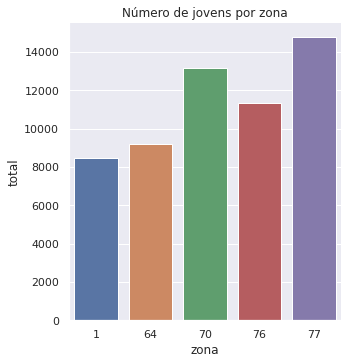

In [16]:
sns.catplot(data = df_jovem, x = 'zona', y = 'total', kind ='bar', )
plt.title('Número de jovens por zona');

In [18]:
#separando um data frame para idosos
df_idosos = df_grupo_idade_ct[['zona', '60 a 64 anos','65 a 69 anos','70 a 74 anos','75 a 79 anos','80 a 84 anos','85 a 89 anos','90 a 94 anos','95 a 99 anos','100 anos ou mais']]

#substituindo os NaN por 0 no data frame para nao anular a soma
df_idosos['95 a 99 anos'][1]= 0.0
df_idosos['100 anos ou mais'][1]= 0.0
df_idosos['100 anos ou mais'][2]= 0.0
df_idosos['100 anos ou mais'][4]= 0.0

#realizando a soma total e adicionando uma nova coluna
total_idosos = df_idosos['60 a 64 anos']+df_idosos['65 a 69 anos']+df_idosos['70 a 74 anos']+df_idosos['75 a 79 anos']+df_idosos['80 a 84 anos']+df_idosos['85 a 89 anos']+df_idosos['90 a 94 anos']+df_idosos['95 a 99 anos']+df_idosos['100 anos ou mais']
df_idosos['total']= total_idosos
df_idosos

<ipython-input-18-79e97acaff78>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_idosos['95 a 99 anos'][1]= 0.0
<ipython-input-18-79e97acaff78>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_idosos['100 anos ou mais'][1]= 0.0
<ipython-input-18-79e97acaff78>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_idosos['100 anos ou mais'][2]= 0.0
<ipython-input-18-79e97acaff78>:7: SettingWithCopyWarning: 
A value is trying to be se

grupo_idade,zona,60 a 64 anos,65 a 69 anos,70 a 74 anos,75 a 79 anos,80 a 84 anos,85 a 89 anos,90 a 94 anos,95 a 99 anos,100 anos ou mais,total
0,1,440.0,385.0,278.0,176.0,129.0,65.0,28.0,5.0,1.0,1507.0
1,64,251.0,216.0,167.0,121.0,64.0,43.0,13.0,0.0,0.0,875.0
2,70,378.0,294.0,210.0,126.0,57.0,23.0,6.0,1.0,0.0,1095.0
3,76,956.0,753.0,422.0,133.0,94.0,60.0,24.0,4.0,4.0,2450.0
4,77,330.0,233.0,146.0,122.0,59.0,27.0,8.0,2.0,0.0,927.0


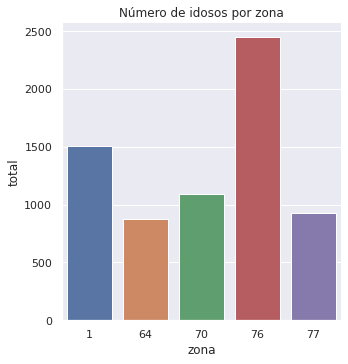

In [19]:
sns.catplot(data = df_idosos, x = 'zona', y = 'total', kind ='bar', )
plt.title('Número de idosos por zona');

#**Conclusão**

Realizando esta pesquisa utilizando os dados abertos do TSE sobre as eleições 2022, conseguimos ver as correlações entre as variáveis sobre os eleitores, e a importância de entender como está distribuído os eleitores nas zonas, onde a quantidade de idosos e pessoas com deficiencia é maior, pensando em medidas de acessibilidade para as zonas.

Graças a este projeto se torna possível enxergar quais as zonas eleitorais que possui mais jovens, idosos, homens, mulheres, pessoas analfabetas e pessoas com o ensino superior completo ou incompleto.

Gostariamos de ter trabalhado com todas as seções eleitorais não só as zonas, o qual no futuro poderia ser uma melhoria e tanto para a realização este trabalho, e também relacionar a quantidade de votos para a presidência, com as caracteristicas das seções vendo se existe alguma relação entre essas duas coisas.